In [5]:
import pandas as pd

# Load the dataset

car_data = pd.read_csv("CAR DETAILS.csv")

# Display basic information and the first few rows of the dataset
car_data_info = car_data.info()
car_data_head = car_data.head()

# Check for missing values
missing_values = car_data.isnull().sum()

# Display summary statistics
summary_stats = car_data.describe()

car_data_info, car_data_head, missing_values, summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


(None,
                        name  year  selling_price  km_driven    fuel  \
 0             Maruti 800 AC  2007          60000      70000  Petrol   
 1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
 2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
 3    Datsun RediGO T Option  2017         250000      46000  Petrol   
 4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
 
   seller_type transmission         owner  
 0  Individual       Manual   First Owner  
 1  Individual       Manual   First Owner  
 2  Individual       Manual   First Owner  
 3  Individual       Manual   First Owner  
 4  Individual       Manual  Second Owner  ,
 name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 dtype: int64,
               year  selling_price      km_driven
 count  4340.000000   4.340000e+03    4340.000000
 mean   2013.090783

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
cleaned_car_data = car_data.copy()

# Handle categorical columns using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply label encoding to categorical columns
for col in categorical_columns:
    cleaned_car_data[col] = label_encoder.fit_transform(cleaned_car_data[col])

# Remove outliers using the IQR method
Q1 = cleaned_car_data[['selling_price', 'km_driven']].quantile(0.25)
Q3 = cleaned_car_data[['selling_price', 'km_driven']].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((cleaned_car_data[['selling_price', 'km_driven']] < (Q1 - 1.5 * IQR)) | 
                      (cleaned_car_data[['selling_price', 'km_driven']] > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_car_data = cleaned_car_data[outlier_condition]

# Display cleaned dataset information
cleaned_car_data.info()
cleaned_car_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3962 non-null   object
 1   year           3962 non-null   int64 
 2   selling_price  3962 non-null   int64 
 3   km_driven      3962 non-null   int64 
 4   fuel           3962 non-null   int32 
 5   seller_type    3962 non-null   int32 
 6   transmission   3962 non-null   int32 
 7   owner          3962 non-null   int32 
dtypes: int32(4), int64(3), object(1)
memory usage: 216.7+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Step 1: Handling Missing Values
# Check for missing values and use SimpleImputer to fill if necessary
imputer = SimpleImputer(strategy='most_frequent')  # Using 'most_frequent' to fill missing categorical values
car_data = pd.DataFrame(imputer.fit_transform(car_data), columns=car_data.columns)

# Step 2: One-Hot Encoding for categorical columns
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns, drop_first=True)

# Step 3: Scaling Numerical Features
scaler = StandardScaler()
numerical_columns = ['year', 'selling_price', 'km_driven']
car_data_encoded[numerical_columns] = scaler.fit_transform(car_data_encoded[numerical_columns])

# Display preprocessed dataset information
car_data_encoded.info()
car_data_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4340 non-null   object 
 1   year                          4340 non-null   float64
 2   selling_price                 4340 non-null   float64
 3   km_driven                     4340 non-null   float64
 4   fuel_Diesel                   4340 non-null   uint8  
 5   fuel_Electric                 4340 non-null   uint8  
 6   fuel_LPG                      4340 non-null   uint8  
 7   fuel_Petrol                   4340 non-null   uint8  
 8   seller_type_Individual        4340 non-null   uint8  
 9   seller_type_Trustmark Dealer  4340 non-null   uint8  
 10  transmission_Manual           4340 non-null   uint8  
 11  owner_Fourth & Above Owner    4340 non-null   uint8  
 12  owner_Second Owner            4340 non-null   uint8  
 13  own

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,-1.445074,-0.767746,0.081139,0,0,0,1,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,-1.445074,-0.638096,-0.347689,0,0,0,1,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,-0.258795,0.165731,0.724381,1,0,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,0.927485,-0.439300,-0.433455,0,0,0,1,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,0.215717,-0.093568,1.603479,1,0,0,0,1,0,1,0,1,0,0


<Figure size 1600x800 with 0 Axes>

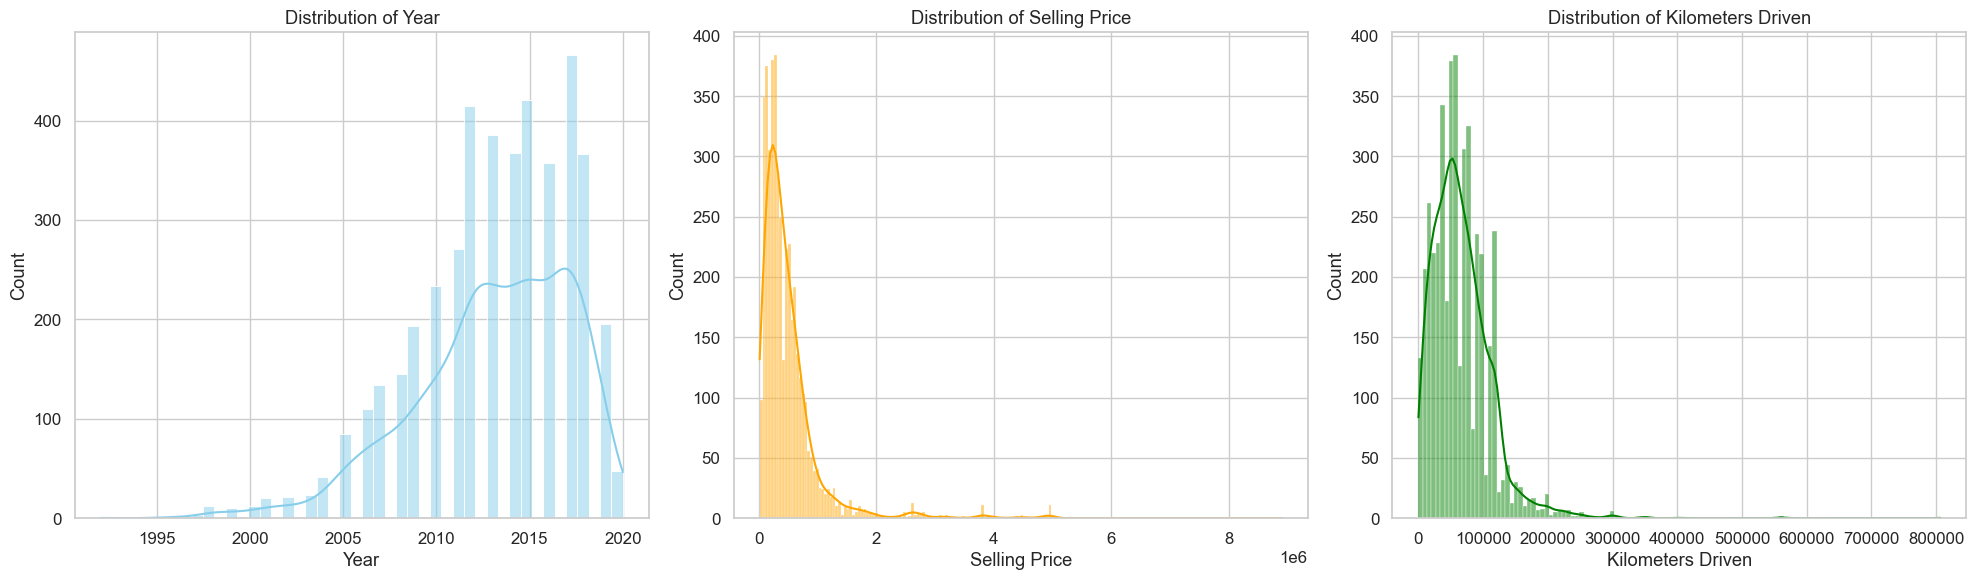

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual aesthetics
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.figure(figsize=(16, 8))
# Step 1: Distribution Analysis of Numerical Features
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Histogram for 'year'
sns.histplot(car_data['year'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Year')
axes[0].set_xlabel('Year')

# Histogram for 'selling_price'
sns.histplot(car_data['selling_price'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Selling Price')
axes[1].set_xlabel('Selling Price')

# Histogram for 'km_driven'
sns.histplot(car_data['km_driven'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Kilometers Driven')
axes[2].set_xlabel('Kilometers Driven')

plt.tight_layout()
plt.show()


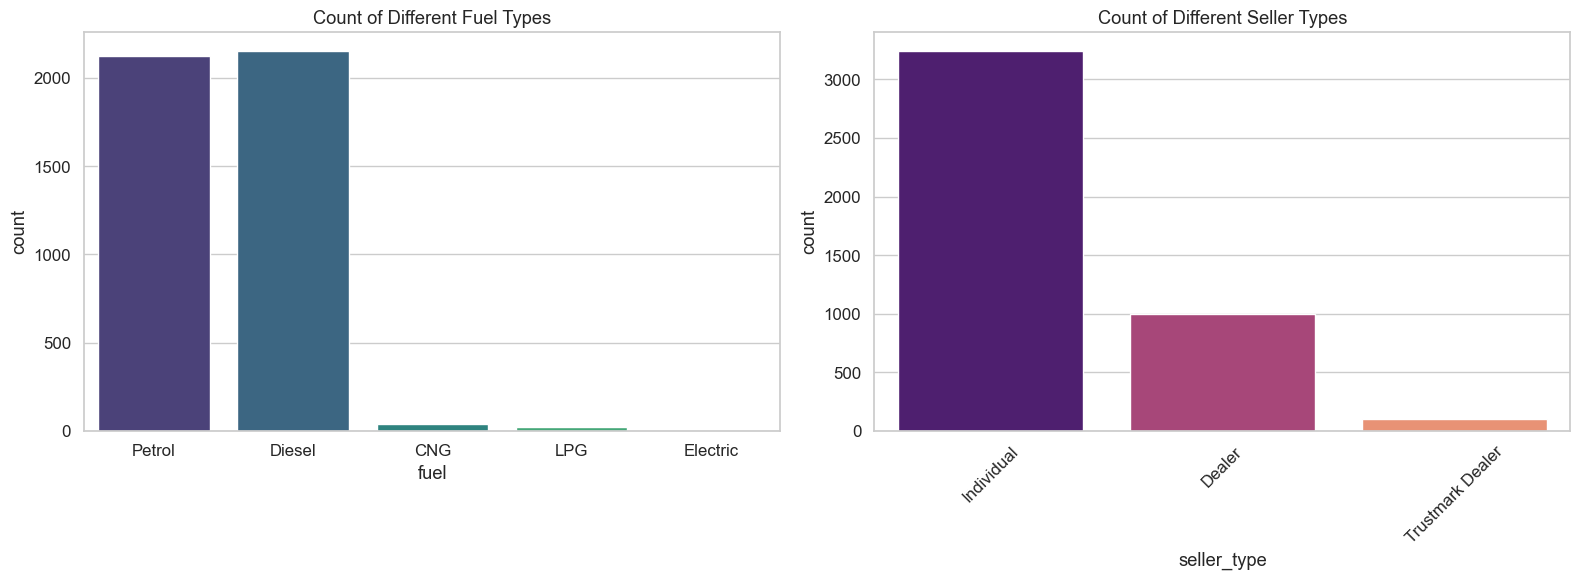

In [9]:
# Step 2: Categorical Features Analysis
plt.figure(figsize=(16, 6))
# Count plot for fuel type
plt.subplot(1, 2, 1)
sns.countplot(x='fuel', data=car_data, palette='viridis')
plt.title('Count of Different Fuel Types')

# Count plot for seller type
plt.subplot(1, 2, 2)
sns.countplot(x='seller_type', data=car_data, palette='magma')
plt.title('Count of Different Seller Types')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\SUDARSHAN PANDEY\AppData\Local\Temp\ipykernel_13980\2557464019.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_data_encoded.corr()


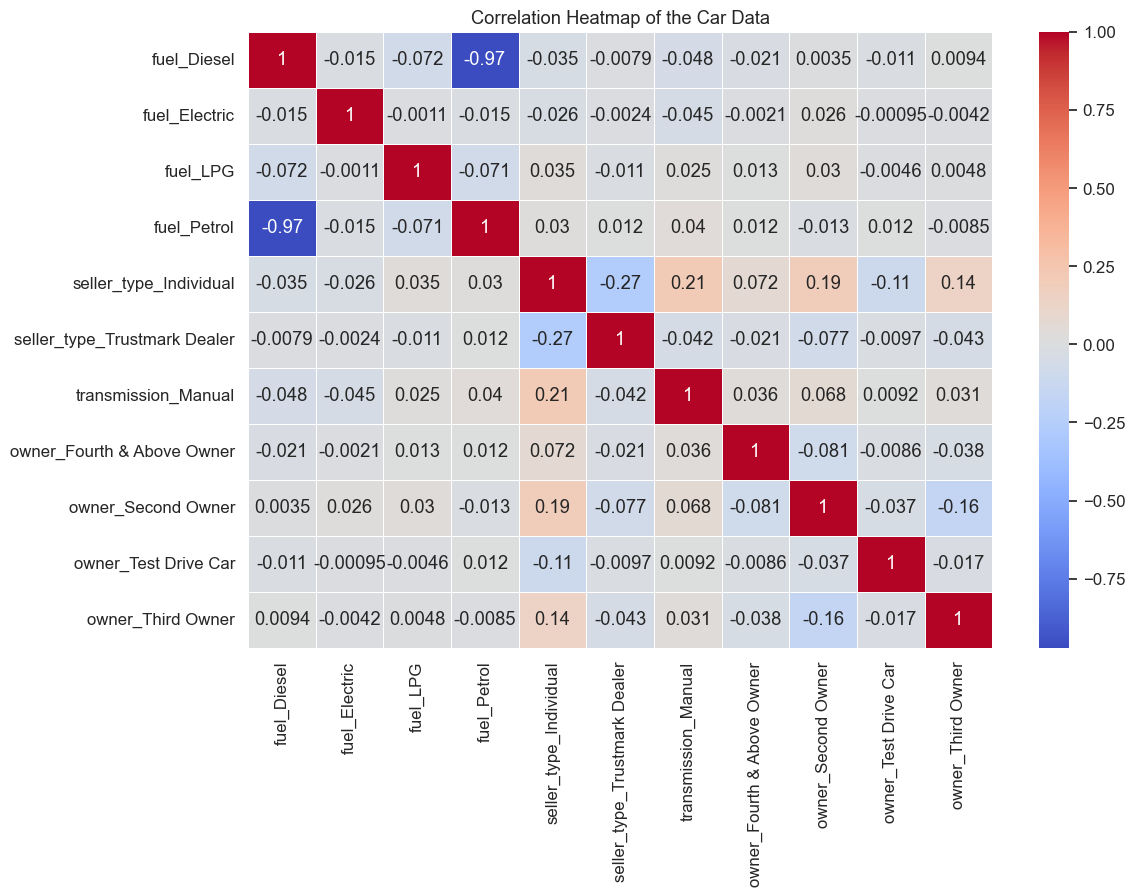

In [10]:
# Step 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns, drop_first=True)
correlation_matrix = car_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Car Data')
plt.show()



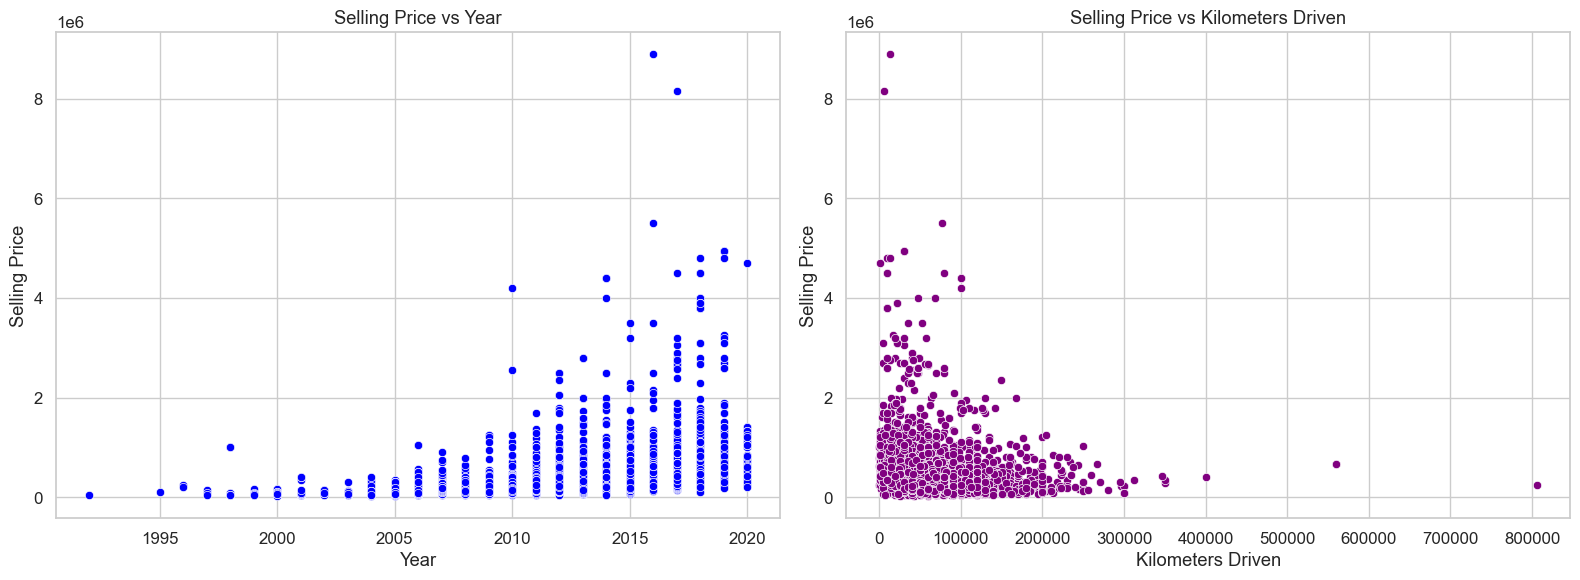

In [11]:
# Step 4: Scatter Plots to Show Relationships
plt.figure(figsize=(16, 6))
# Scatter plot: Selling Price vs Year
plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='selling_price', data=car_data, color='blue')
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')

# Scatter plot: Selling Price vs Kilometers Driven
plt.subplot(1, 2, 2)
sns.scatterplot(x='km_driven', y='selling_price', data=car_data, color='purple')
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("CAR DETAILS.csv")

# Step 1: Handle Missing Values (if any)
# Replace missing numerical values with median and categorical values with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Numerical and Categorical Columns
numerical_columns = ['year', 'selling_price', 'km_driven']
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply imputation
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Step 2: Remove Duplicates
data = data.drop_duplicates()

# Step 3: Encode Categorical Variables
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
encoded_df = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate the encoded ones
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 4: Scaling Numerical Data
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 5: Split Data into Features and Target Variable
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable

# Step 6: Splitting into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display final prepared data
print("Data Preparation Complete. Ready for Modeling!")


Data Preparation Complete. Ready for Modeling!


C:\Users\SUDARSHAN PANDEY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


# Step 1: Check and Display Column Names to Identify Discrepancies
print("Original Column names in the dataset:")
print(data.columns)

# Strip any leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Display the updated column names to verify
print("\nUpdated Column names after stripping whitespace:")
print(data.columns)

# Drop the 'name' column if it exists, as it contains string values that cannot be directly used
if 'name' in data.columns:
    data = data.drop('name', axis=1)

# Step 2: Identify Categorical Columns that are present in the dataset
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
categorical_columns = [col for col in categorical_columns if col in data.columns]  # Only keep existing columns

print(f"\nAvailable Categorical Columns: {categorical_columns}")

# Step 3: Handle Categorical Variables using One-Hot Encoding
# Only encode categorical columns that are available in the dataset
if categorical_columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_df = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), 
                              columns=encoder.get_feature_names_out(categorical_columns))

    # Drop original categorical columns and concatenate the encoded columns
    data = data.drop(categorical_columns, axis=1)
    data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 4: Scale Numerical Columns if they exist in the dataset
numerical_columns = ['year', 'km_driven']
numerical_columns = [col for col in numerical_columns if col in data.columns]  # Check for existence

if numerical_columns:
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 5: Prepare Features (X) and Target Variable (y)
# Check if 'selling_price' exists in the columns
if 'selling_price' in data.columns:
    X = data.drop('selling_price', axis=1)  # Features
    y = data['selling_price']  # Target variable
else:
    raise ValueError("The 'selling_price' column is not present in the dataset.")

# Step 6: Splitting into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate model using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R-squared (R²)": r2
    }

# Print model evaluation results
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("-" * 50)


Original Column names in the dataset:
Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

Updated Column names after stripping whitespace:
Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

Available Categorical Columns: []
Model: Linear Regression
Mean Absolute Error (MAE): 0.4184178462703889
Mean Squared Error (MSE): 0.7544224914512655
R-squared (R²): 0.39269348342683574
--------------------------------------------------
Model: D

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib  # Import joblib for saving models


# Step 1: Check and Display Column Names to Identify Discrepancies
print("Original Column names in the dataset:")
print(data.columns)

# Strip any leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Drop the 'name' column if it exists
if 'name' in data.columns:
    data = data.drop('name', axis=1)

# Step 2: Identify Categorical Columns that are present in the dataset
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
categorical_columns = [col for col in categorical_columns if col in data.columns]  # Only keep existing columns

# Step 3: Handle Categorical Variables using One-Hot Encoding
if categorical_columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_df = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), 
                              columns=encoder.get_feature_names_out(categorical_columns))

    # Drop original categorical columns and concatenate the encoded columns
    data = data.drop(categorical_columns, axis=1)
    data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 4: Scale Numerical Columns if they exist in the dataset
numerical_columns = ['year', 'km_driven']
numerical_columns = [col for col in numerical_columns if col in data.columns]  # Check for existence

if numerical_columns:
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 5: Prepare Features (X) and Target Variable (y)
if 'selling_price' in data.columns:
    X = data.drop('selling_price', axis=1)  # Features
    y = data['selling_price']  # Target variable
else:
    raise ValueError("The 'selling_price' column is not present in the dataset.")

# Step 6: Splitting into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
best_model_name = ""
best_model = None
best_r2_score = float('-inf')

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate model using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R-squared (R²)": r2
    }
    
    # Update best model based on R² score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_model = model

# Print model evaluation results
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("-" * 50)

# Step 7: Save the best model
if best_model:
    joblib.dump(best_model, 'best_car_price_model.pkl')
    print(f"Best model '{best_model_name}' saved successfully.")

# Step 8: Load the best model
loaded_model = joblib.load('best_car_price_model.pkl')
print(f"Loaded model: {loaded_model}")


Original Column names in the dataset:
Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')
Model: Linear Regression
Mean Absolute Error (MAE): 0.4184178462703889
Mean Squared Error (MSE): 0.7544224914512655
R-squared (R²): 0.39269348342683574
--------------------------------------------------
Model: Decision Tree Regressor
Mean Absolute Error (MAE): 0.43392585799579386
Mean Squared Error (MSE): 0.9741749484448792
R-squared (R²): 0.2157938009843663
--------------------------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.37904732711444244
Mean Squared Error (MSE): 0.6883265199927905
R-squared (R²): 0.4459004260098284
--------------------------------------------------
Model: G

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the original dataset
data = pd.read_csv("CAR DETAILS.csv")

# Step 1: Data Cleaning and Preprocessing
# Strip any leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Drop irrelevant or unnecessary columns
if 'name' in data.columns:
    data = data.drop('name', axis=1)

# Step 2: Identify categorical columns for encoding
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Step 3: Split the dataset into training and testing sets
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
encoder.fit(X_train[categorical_columns])  # Fit on the training set

# Save the encoder for later use
joblib.dump(encoder, 'encoder.pkl')

# Now, proceed with your model training...


C:\Users\SUDARSHAN PANDEY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['encoder.pkl']

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the original dataset
data = pd.read_csv("CAR DETAILS.csv")

# Step 1: Data Cleaning and Preprocessing
# Strip any leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Drop irrelevant or unnecessary columns
if 'name' in data.columns:
    data = data.drop('name', axis=1)

# Step 2: Identify categorical columns for encoding
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Check if the categorical columns exist in the DataFrame
missing_columns = [col for col in categorical_columns if col not in data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")

# Step 3: Split the dataset into training and testing sets
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the columns of the training data
print("Training Features Columns:", X_train.columns)

# Step 4: Fit the OneHotEncoder only on existing categorical columns
# Filter categorical columns to include only those that exist
existing_categorical_columns = [col for col in categorical_columns if col in X_train.columns]
if existing_categorical_columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
    encoder.fit(X_train[existing_categorical_columns])  # Fit on the training set

    # Save the encoder for later use
    joblib.dump(encoder, 'encoder.pkl')
else:
    print("No categorical columns to encode.")


Training Features Columns: Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


C:\Users\SUDARSHAN PANDEY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
# Load the original dataset
original_data = pd.read_csv("CAR DETAILS.csv")

# Sample 20 random data points
sampled_data = original_data.sample(n=20, random_state=42)

# Strip whitespace from column names
sampled_data.columns = sampled_data.columns.str.strip()

# Drop the 'name' column if it exists
if 'name' in sampled_data.columns:
    sampled_data = sampled_data.drop('name', axis=1)

# Load the saved OneHotEncoder
encoder = joblib.load('encoder.pkl')

# Identify categorical columns
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
categorical_columns = [col for col in categorical_columns if col in sampled_data.columns]

# Handle Categorical Variables using the loaded One-Hot Encoder
if categorical_columns:
    encoded_df = pd.DataFrame(encoder.transform(sampled_data[categorical_columns]), 
                              columns=encoder.get_feature_names_out(categorical_columns))

    # Drop original categorical columns and concatenate the encoded columns
    sampled_data = sampled_data.drop(categorical_columns, axis=1)
    sampled_data = pd.concat([sampled_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Scale Numerical Columns if they exist in the sampled data
numerical_columns = ['year', 'km_driven']
numerical_columns = [col for col in numerical_columns if col in sampled_data.columns]

if numerical_columns:
    scaler = StandardScaler()
    sampled_data[numerical_columns] = scaler.fit_transform(sampled_data[numerical_columns])

# Load the best model
loaded_model = joblib.load('best_car_price_model.pkl')

# Prepare Features (X) for the sampled data
if 'selling_price' in sampled_data.columns:
    X_sampled = sampled_data.drop('selling_price', axis=1)
    y_actual = sampled_data['selling_price']
else:
    raise ValueError("The 'selling_price' column is not present in the sampled dataset.")

# Make predictions using the loaded model
y_predicted = loaded_model.predict(X_sampled)

# Evaluate the model predictions against actual selling prices
results = pd.DataFrame({'Actual Price': y_actual, 'Predicted Price': y_predicted})
print("\nActual vs Predicted Prices:")
print(results)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
r2 = r2_score(y_actual, y_predicted)

print(f"\nModel Evaluation Metrics on Sampled Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Actual vs Predicted Prices:
    Actual Price  Predicted Price
0         165000        298500.00
1         250000         80010.00
2         120000         84670.00
3         450000        292550.00
4         730000       3356890.00
5         155000         84670.00
6         530000         75140.00
7          92800         84670.00
8         284000        292550.00
9         260000         75140.00
10        511000        302699.99
11       1800000        298500.00
12        320000        292850.00
13         90000        292550.00
14        850000         75140.00
15        500000         80010.00
16        624000        302699.99
17        750000       3356890.00
18        125000         80010.00
19        675000       3708690.00

Model Evaluation Metrics on Sampled Data:
Mean Absolute Error (MAE): 649555.5009999999
Mean Squared Error (MSE): 1322016382734.6
R-squared (R²): -7.8105812330764675


In [48]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [49]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and encoder
model = joblib.load('best_car_price_model.pkl')
encoder = joblib.load('encoder.pkl')

# Function to preprocess the input data
def preprocess_input(input_data):
    # Convert the input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # One-hot encode categorical variables
    categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
    existing_categorical_cols = [col for col in categorical_cols if col in input_df.columns]

    if existing_categorical_cols:
        encoded_df = pd.DataFrame(encoder.transform(input_df[existing_categorical_cols]), 
                                  columns=encoder.get_feature_names_out(existing_categorical_cols))
        
        input_df = input_df.drop(existing_categorical_cols, axis=1)
        input_df = pd.concat([input_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

    return input_df

# Streamlit app layout
st.title("Car Price Prediction App")

# Input fields for the user
year = st.number_input("Year", min_value=1900, max_value=2024, value=2021)
km_driven = st.number_input("Kilometers Driven", min_value=0, value=50000)
fuel = st.selectbox("Fuel Type", options=['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'])
seller_type = st.selectbox("Seller Type", options=['Dealer', 'Individual'])
transmission = st.selectbox("Transmission Type", options=['Manual', 'Automatic'])
owner = st.selectbox("Owner Type", options=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'])

# Button to predict the price
if st.button("Predict Price"):
    input_data = {
        'year': year,
        'km_driven': km_driven,
        'fuel': fuel,
        'seller_type': seller_type,
        'transmission': transmission,
        'owner': owner
    }
    
    processed_data = preprocess_input(input_data)
    prediction = model.predict(processed_data)
     
    st.success(f"The predicted price of the car is: ₹{prediction[0]:,.2f}")



2024-10-05 18:59:29.151 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59:29.490 
  command:

    streamlit run C:\Users\SUDARSHAN PANDEY\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-05 18:59:29.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59:29.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59:29.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59:29.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59:29.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 18:59: